In [1]:
#set seed for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
from tensorflow.keras import layers , models
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [9]:
type(train_images)

numpy.ndarray

In [10]:
type(train_labels)

numpy.ndarray

In [12]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

60000
60000
10000
10000


In [13]:
print(train_images[0].shape)

(28, 28)


In [15]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [16]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


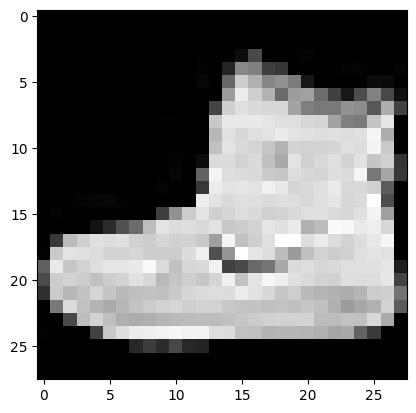

In [17]:
#display an image from the dataset
plt.imshow(train_images[0] , cmap='gray')
plt.show()

In [18]:
print(train_labels[0])

9


In [19]:
#normaliize pixel values to be between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

In [21]:
#reshape images to specify that its a single channel( grayscale)
train_images = train_images.reshape((train_images.shape[0], 28 , 28 ,1))
test_images = test_images.reshape((test_images.shape[0], 28 , 28 , 1))

In [29]:
print(train_images[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [22]:
train_images.shape

(60000, 28, 28, 1)

In [23]:
test_images.shape

(10000, 28, 28, 1)

Convolutional Neural Network

In [24]:

# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [25]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 16s 6ms/step - loss: 0.4859 - accuracy: 0.8219 - val_loss: 0.3594 - val_accuracy: 0.8722
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3174 - accuracy: 0.8832 - val_loss: 0.3169 - val_accuracy: 0.8824
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2702 - accuracy: 0.8997 - val_loss: 0.3009 - val_accuracy: 0.8914
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2406 - accuracy: 0.9109 - val_loss: 0.2774 - val_accuracy: 0.9000
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2182 - accuracy: 0.9188 - val_loss: 0.2927 - val_accuracy: 0.8971


In [27]:

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2927 - accuracy: 0.8971 - 639ms/epoch - 2ms/step

Test accuracy: 0.8970999717712402


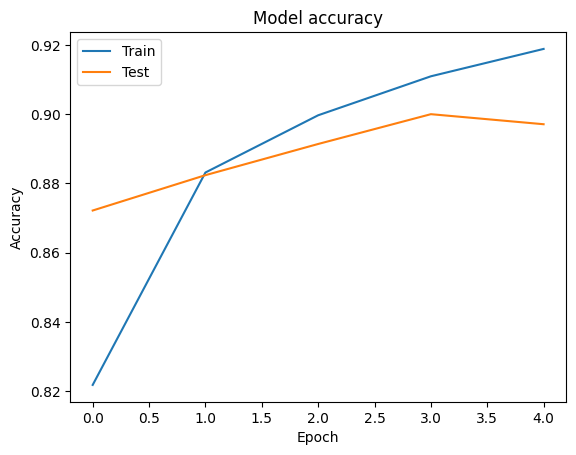

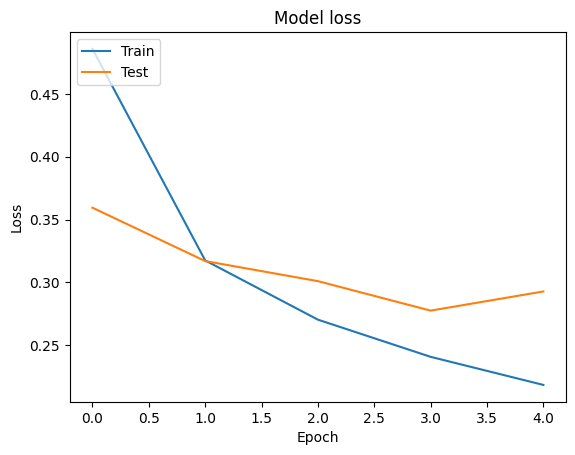

In [28]:


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()